---

## 📌 Project Overview

In this project, we build a Convolutional Neural Network (CNN) to classify handwritten digits (0–9) using the MNIST dataset.

The objective is to understand how CNNs extract spatial features from image data and perform multi-class classification effectively.

---

## 📊 Dataset Description

The MNIST dataset contains:

- 60,000 training images
- 10,000 testing images
- Image size: 28 × 28 pixels
- Grayscale images (single channel)
- 10 classes representing digits from 0 to 9

Each pixel value ranges from 0 to 255, representing intensity.

---

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print("Training shape:", x_train.shape)
print("Test shape:", x_test.shape)

E0000 00:00:1772264647.986462      24 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1772264648.092956      24 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1772264649.082772      24 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1772264649.082815      24 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1772264649.082818      24 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1772264649.082820      24 computation_placer.cc:177] computation placer already registered. Please check linka

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


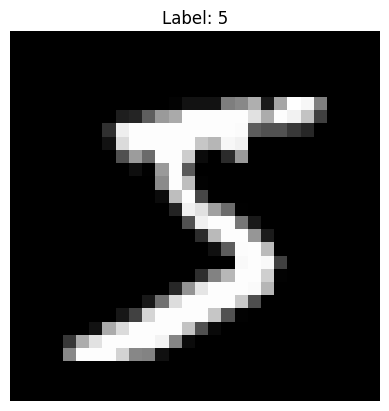

In [2]:
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.axis('off')
plt.show()

---

## 🔄 Data Preprocessing

The following preprocessing steps were applied:

- Normalization: Pixel values were scaled from [0,255] to [0,1] to improve gradient stability and training speed.

- Reshaping: Images were reshaped to (28,28,1) to include the channel dimension required for CNN input.

- One-hot Encoding: Labels were converted into categorical vectors for multi-class classification using softmax output.

These steps ensure the model trains efficiently and correctly.

---

In [3]:
# Normalize pixel values (0-255 → 0-1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Add channel dimension
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print("New training shape:", x_train.shape)

New training shape: (60000, 28, 28, 1)


In [4]:
y_train.shape

(60000,)

In [5]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

print("Label shape:", y_train.shape)

Label shape: (60000, 10)


---

## 🏗 Model Architecture

The CNN architecture consists of:

- Two Convolutional layers to extract spatial features
- MaxPooling layers to reduce spatial dimensions and prevent overfitting
- A Flatten layer to convert feature maps into a 1D vector
- A fully connected Dense layer
- A final Softmax output layer with 10 neurons for digit classification

The model was trained using:

- Optimizer: Adam
- Loss Function: Categorical Crossentropy
- Metric: Accuracy

These steps ensure the model trains efficiently and correctly.

---

In [6]:
model = models.Sequential([
    layers.Input(shape=(28,28,1)),   
    
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

I0000 00:00:1772264690.351096      24 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13757 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1772264690.357064      24 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13757 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [7]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
history = model.fit(
    x_train, y_train,
    epochs=5,
    validation_split=0.1
)

Epoch 1/5


I0000 00:00:1772264694.000690      68 service.cc:152] XLA service 0x792cc800ace0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1772264694.000726      68 service.cc:160]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1772264694.000733      68 service.cc:160]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1772264694.397004      68 cuda_dnn.cc:529] Loaded cuDNN version 91002


  65/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5220 - loss: 1.5464

I0000 00:00:1772264697.419874      68 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9053 - loss: 0.3076 - val_accuracy: 0.9840 - val_loss: 0.0562
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9857 - loss: 0.0475 - val_accuracy: 0.9883 - val_loss: 0.0406
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9901 - loss: 0.0307 - val_accuracy: 0.9880 - val_loss: 0.0414
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9930 - loss: 0.0200 - val_accuracy: 0.9910 - val_loss: 0.0298
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9947 - loss: 0.0150 - val_accuracy: 0.9898 - val_loss: 0.0359


In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9860 - loss: 0.0402
Test Accuracy: 0.9894999861717224


---

## 📈 Model Performance

After training:

- Training Accuracy: ~99%
- Validation Accuracy: ~99%
- Test Accuracy: 98.8%

The model generalizes well with minimal overfitting.

---

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


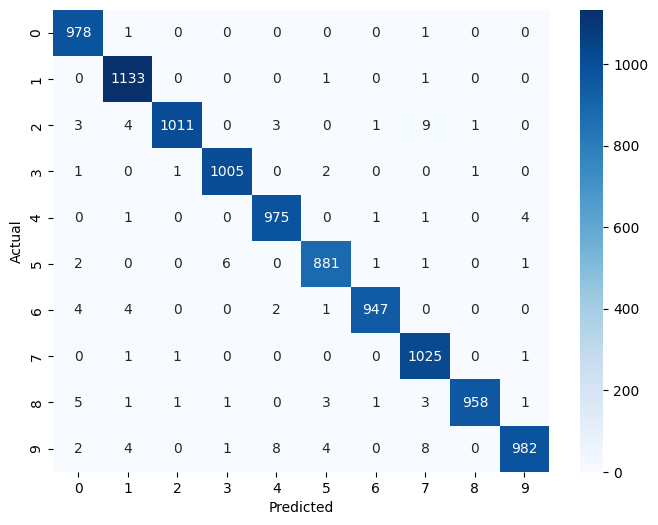

In [10]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict classes
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

---

## 🔍 Confusion Matrix Analysis

The confusion matrix shows that:

- Most predictions lie along the diagonal, indicating strong performance.

Minor confusion occurs between visually similar digits such as:

- 5 and 3
- 9 and 4
- 6 and 0

These errors are expected due to handwriting variations.

---

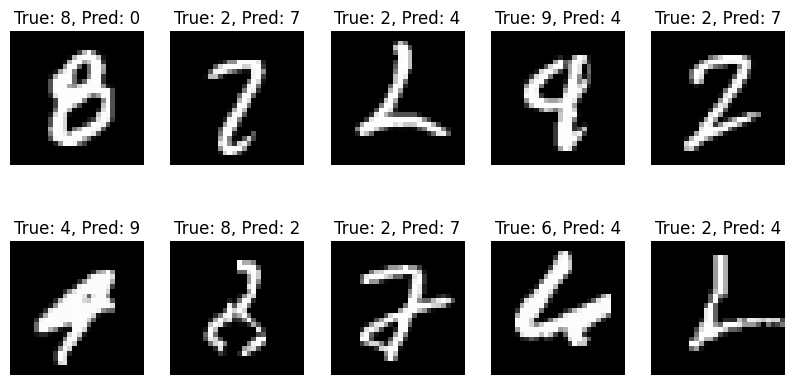

In [11]:
misclassified = np.where(y_pred_classes != y_true)[0]

plt.figure(figsize=(10,5))

for i, index in enumerate(misclassified[:10]):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[index].reshape(28,28), cmap='gray')
    plt.title(f"True: {y_true[index]}, Pred: {y_pred_classes[index]}")
    plt.axis('off')

plt.show()

---

## 🏁 Conclusion

This project demonstrates how Convolutional Neural Networks can successfully perform image classification tasks.

By building and evaluating this model, we gained practical understanding of:

- Feature extraction using convolution
- Pooling operations
- Multi-class classification
- Model evaluation and error analysis

This serves as a strong foundation for more complex image classification tasks.

---